<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/LHC_MallCustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINK: https://www.kaggle.com/shwetabh123/mall-customers


Customer Segmentation is one the most important applications of unsupervised learning. Using 
clustering techniques, companies can identify the several segments of customers allowing them to 
target the potential user base.

In [ ]:
import numpy as np  #helps in mathematical operations
import matplotlib.pyplot as plt #helps in plotting of graph
import pandas as pd #helps in making dataframes and importing csv files

In [ ]:
from google.colab import drive #to import google drive data

In [ ]:
drive.mount('/content/drive') # mount the drive on colab using authentication

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Long Hour Coding"

/content/drive/My Drive/Colab Notebooks/Long Hour Coding


In [ ]:
#Reading the csv file
dataset=pd.read_csv("Mall_Customers.csv")
print(dataset)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [18]:
dataset.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

# ***TASK - 1***

Create a pie chart to show the distribution of male and female

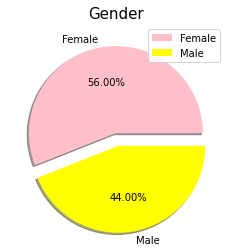

In [ ]:
size = dataset['Genre'].value_counts()
colors = ['pink', 'yellow']
plt.pie(size, colors = colors, explode = [0, 0.15], labels = ['Female', 'Male'], shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()


# ***TASK - 2***

Show the histogram of ages (with each bin of 1- years) with respect to the number of counts


In [19]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


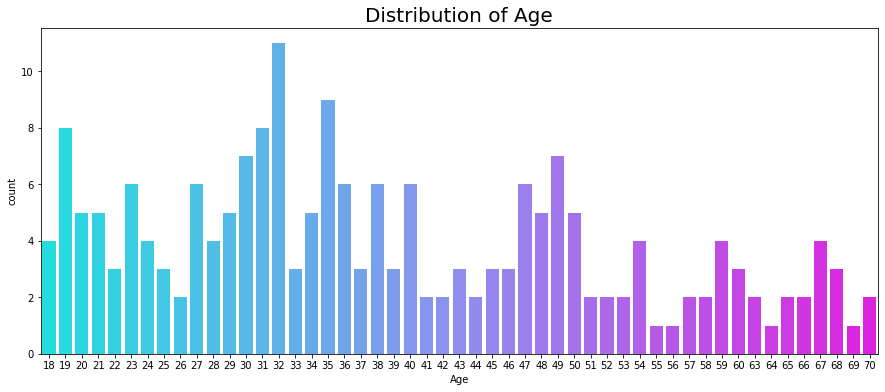

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(dataset['Age'], palette = 'cool')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

# ***TASK - 3***

Display the boxplot of analysis of age

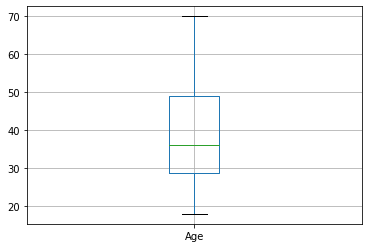

In [39]:
age = dataset.iloc[:,2:3]
x_box=age.boxplot(column=['Age'])

# ***TASK - 4***

Show the histogram of income (with each bin of Rs. 10K) with respect to the number of 
counts

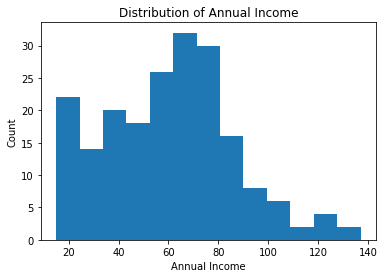

In [34]:
plt.hist(dataset['Annual Income (k$)'],bins=13)
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.title("Distribution of Annual Income")
plt.show()

# ***TASK - 5***

Show the histogram of spending score (with each bin of 10) with respect to the number of 
counts

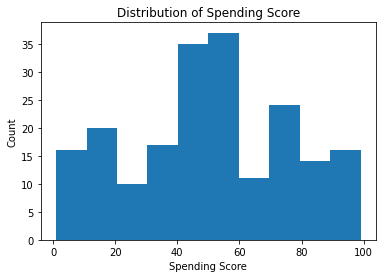

In [35]:
plt.hist(dataset['Spending Score (1-100)'],bins=10)
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.title("Distribution of Spending Score")
plt.show()

# ***TASK - 6***

Cluster the data such that you can know your spending score w.r.t your annual income 
target that you may have set after 3 years from the date

In [40]:
from sklearn.cluster import KMeans

In [53]:
X = dataset.iloc[:,3:].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

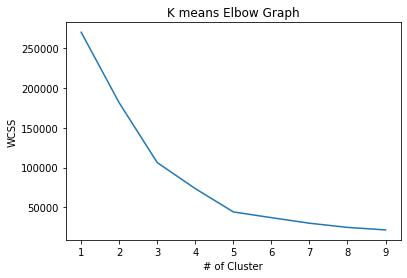

In [54]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)        #residual values which we are having.
plt.plot(range(1,10),wcss)
plt.title('K means Elbow Graph')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [55]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)

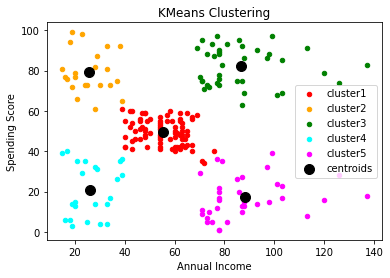

In [56]:
#visualize the Cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=20,c='red',label='cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=20,c='orange',label='cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=20,c='green',label='cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=20,c='cyan',label='cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=20,c='magenta',label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroids')

plt.title('KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()  
plt.show()